In [9]:
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

Importing diabetes dataset from sklearn

In [10]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

Data Visualization

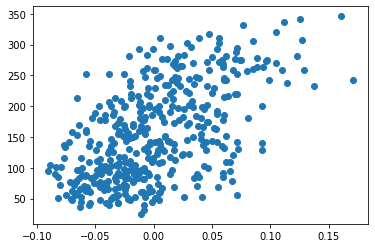

In [40]:
plt.scatter(diabetes_X_train, diabetes_y_train)

Linear Regression handcoding

In [4]:
class Linear_Regression:
  def __init__(self, lr = 0.001, iteration = 10):
    self.lr = lr
    self.iteration = iteration
    self.weights = None
    self.bias = None

  def fit(self, X_train, Y_train):
    samples, features = X_train.shape
    self.weights = np.zeros(features)
    self.bias = 0 
    for iters in range(self.iteration):
      y_pred = np.dot(X_train, self.weights)  + self.bias
      dweights = (1/samples) * np.dot(X_train.T, [np.expand_dims(y_pred,axis = 1) - np.expand_dims(Y_train,axis = 1)])
      dbias = (1/samples) * np.sum(y_pred - Y_train)

      self.weights = self.weights - self.lr * dweights
      self.bias = self.bias - self.lr * dbias

  def predict(self, X_test):
      return np.dot(X_test, self.weights)  + self.bias

def mse(y_true, y_pred):
  return np.mean((y_true-y_pred)**2)

regressor = Linear_Regression()
regressor.fit(diabetes_X_train, diabetes_y_train)
predicted = regressor.predict(diabetes_X_test)

mse_value = mse(diabetes_y_test, predicted)


Using Sklearn Library


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
predicted = regr.predict(diabetes_X_test)
mean_squared_error(diabetes_y_test, predicted)

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


2548.0723987259694

Corfficients of linear regression


In [36]:
print("regr.coef_",regr.coef_)
print("intercept", regr.intercept_)
print("rank",regr.rank_)
print("n_features_in_int", regr.n_features_in_)
print("singular_",regr.singular_)

regr.coef_ [938.23786125]
intercept 152.91886182616167
rank 1
n_features_in_int 1
singular_ [0.97759081]


plotting

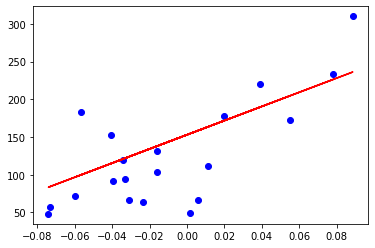

In [41]:
plt.scatter(diabetes_X_test, diabetes_y_test, color="blue")
plt.plot(diabetes_X_test, predicted, color = "red")